In [ ]:
from langgraph.graph import MessagesState
from langchain_core.runnables.config import RunnableConfig
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import SystemMessage, HumanMessage, RemoveMessage, AIMessage, AnyMessage
from langgraph.graph import StateGraph, START, END
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image, display
from typing import List, Dict, Any, TypedDict, Annotated
from pydantic import BaseModel
from fcgb.utils import load_txt
from fcgb.prompt_manager import PromptManager
import nest_asyncio
from fcgb.chatbots.chatbot import BaseChatBot
from fcgb.chatbots.selfconv import SelfConversationChatBot, StrategizedSelfConversationChatBot

# Self conv

### fake llm test

In [4]:
from fcgb.fake_models import FakeLLM
from fcgb.cfg.chat_inputs_spec import SelfConversationConfig

fake_llm = FakeLLM()
memory = MemorySaver()

chatbot = SelfConversationChatBot(
    llm=fake_llm,
    initial_messages_spec=SelfConversationConfig.initial_messages_spec,
    internal_messages_spec=SelfConversationConfig.internal_messages_spec,
    memory=memory,
    global_inputs={'max_turns_num': 3},
    init_values=SelfConversationConfig.init_values,
    prompt_manager_spec=SelfConversationConfig.prompt_manager_spec
)

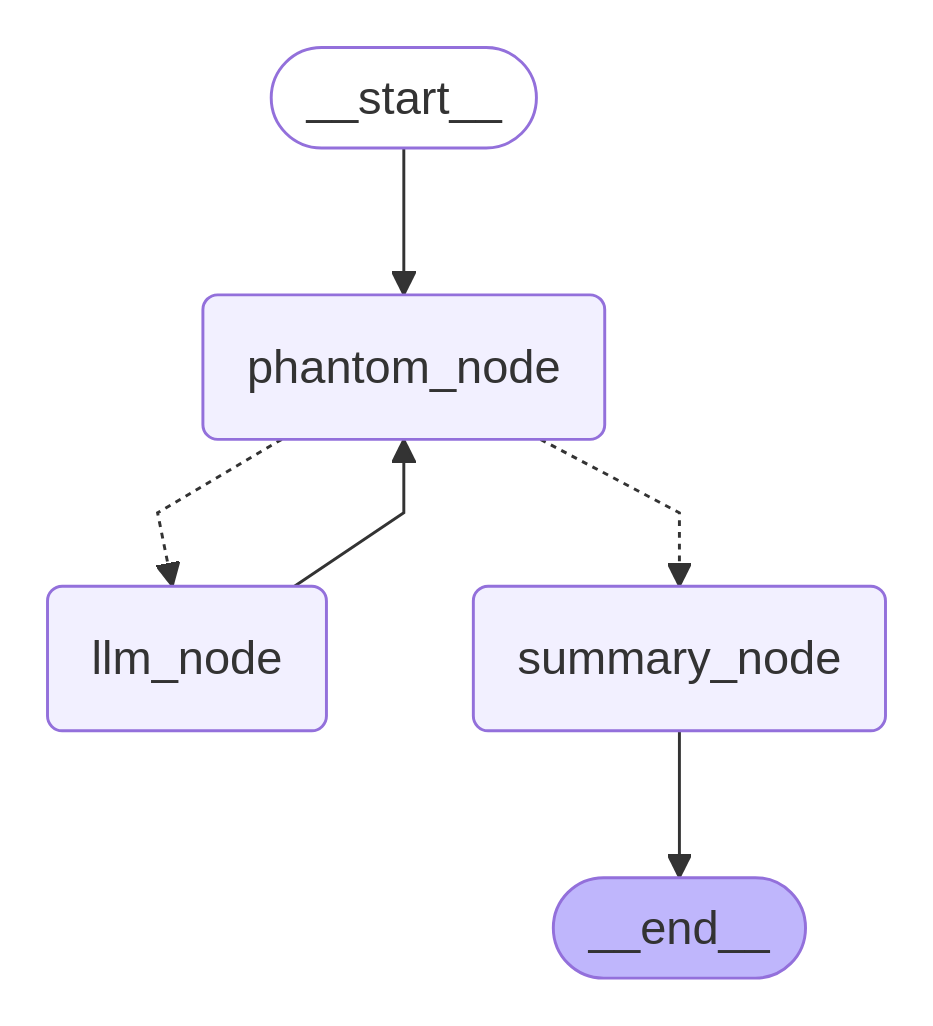

In [31]:
chatbot.display_graph()

In [6]:
chatbot.prompt_manager.prompt_versions('self_conv_summary')

Version 1.2
Version 1.0 (default)


In [7]:
inputs = {
    'template_inputs': {
        'task': 'List all variants of Chain-of-Thought (CoT) prompting.',
        'context': 'You want to prepare a full list of different CoT prompting methods for further research.'
    },
    'sc_thread_id': 'test_1/sc1',
    'parent_thread_id': 'test_1'
}

result = chatbot.run(**inputs)
result

{'phantom_perspective': [SystemMessage(content="Your mission is to by a conversation with some field expert extract information to accomplish your task with a given context.\nYou have maximum of 3 question-answer turns to reach your goal, but you can call the conversation end sign earlier.\nBe persistent to extract as many information as you can to fulfill your task. Ask questions from different angles.\nYou can also argue with the expert when you will feel that their answers are not satisfying. Try different techniques to fully cover your task.\nUse provided context to better direct your questions.\nwhen you feel that you gain necessary information just type '__end__' instead of next question. \n-----\nTASK: \nList all variants of Chain-of-Thought (CoT) prompting.\n-----\nCONTEXT: \nYou want to prepare a full list of different CoT prompting methods for further research.\n-----\nTo finish conversation type: __end__", additional_kwargs={}, response_metadata={}, name='basic'),
  HumanMes

In [30]:
chatbot.get_state('test_1/sc1')

{'to_summary': False,
 'turn': 3,
 'summary': SelfConvModel(answer='Fake string qfhem'),
 'sub_thread_id': 'test_1/sc1',
 'phantom_perspective': [SystemMessage(content="Your mission is to by a conversation with some field expert extract information to accomplish your task with a given context.\nYou have maximum of 3 question-answer turns to reach your goal, but you can call the conversation end sign earlier.\nBe persistent to extract as many information as you can to fulfill your task. Ask questions from different angles.\nYou can also argue with the expert when you will feel that their answers are not satisfying. Try different techniques to fully cover your task.\nUse provided context to better direct your questions.\nwhen you feel that you gain necessary information just type '__end__' instead of next question. \n-----\nTASK: \nList all variants of Chain-of-Thought (CoT) prompting.\n-----\nCONTEXT: \nYou want to prepare a full list of different CoT prompting methods for further resea

### real llm test

In [ ]:
from fcgb.cfg.precompiled import get_llm

llm = get_llm('google')

In [ ]:
memory = MemorySaver()

chatbot = SelfConversationChatBot(
    llm=llm,
    initial_messages_spec=SelfConversationConfig.initial_messages_spec,
    memory=memory,
    global_inputs={'max_turns_num': 6},
    summary_spec=SelfConversationConfig.summary_spec,
    init_values=SelfConversationConfig.init_values
)

In [ ]:
inputs = {
    'template_inputs': {
        'task': 'List all variants of Chain-of-Thought (CoT) prompting.',
        'context': 'You want to prepare a full list of different CoT prompting methods for further research.'
    },
    'sc_thread_id': 'test_1/sc1',
    'parent_thread_id': 'test_1'
}

result = chatbot.run(**inputs)

In [ ]:
for line in result['sc_summary'].answer.split('\n'):
    print(line)

Here's a comprehensive list of Chain-of-Thought (CoT) prompting variants:

*   Standard CoT
*   Zero-shot CoT
*   Self-Consistency
*   Least-to-Most prompting
*   Tree-of-Thoughts (ToT)
*   Graph of Thoughts (GoT)
*   Program-of-Thoughts (PoT)
*   Faithful Chain-of-Thought (Faithful CoT)
*   Complexity-Based CoT
*   Knowledge-augmented CoT
*   Verification-based CoT
*   Adaptive CoT
*   Template-based CoT


In [54]:
for msg in result['phantom_perspective']:
    msg.pretty_print()

================================ System Message ================================
Name: basic

Your mission is to by a conversation with some field expert extract information to accomplish your task with a given context.
You have maximum of 6 question-answer turns to reach your goal, but you can call the conversation end sign earlier.
Be persistent to extract as many information as you can to fulfill your task. Ask questions from different angles.
You can also argue with the expert when you will feel that their answers are not satisfying. Try different techniques to fully cover your task.
Use provided context to better direct your questions.
when you feel that you gain necessary information just type '__end__' instead of next question. 
-----
TASK: 
List all variants of Chain-of-Thought (CoT) prompting.
-----
CONTEXT: 
You want to prepare a full list of different CoT prompting methods for further research. More is better!
-----
To finish conversation type: __end__
======================

# Strategized self conv

### fake llm test

In [ ]:
from fcgb.cfg.chat_inputs_spec import SelfConversationForstrategyConfig, StrategizedSelfConversationConfig
from fcgb.fake_models import FakeLLM
from langgraph.checkpoint.memory import MemorySaver

fake_llm = FakeLLM()
memory = MemorySaver()

chatbot = SelfConversationChatBot(
    llm=fake_llm,
    initial_messages_spec=SelfConversationForstrategyConfig.initial_messages_spec,
    internal_messages_spec=SelfConversationForstrategyConfig.internal_messages_spec,
    memory=memory,
    global_inputs=SelfConversationForstrategyConfig.global_inputs,
    init_values=SelfConversationForstrategyConfig.init_values,
    prompt_manager_spec=SelfConversationForstrategyConfig.prompt_manager_spec
)

In [8]:
inputs = {
    'template_inputs': {
        'task': 'List all variants of Chain-of-Thought (CoT) prompting.',
        'context': 'You want to prepare a full list of different CoT prompting methods for further research.',
        'strategy_description': 'Some strategy description',
        'paraphrased_task': 'Some paraphrased task',
        'paraphrased_context': 'Some paraphrased context'
    },
    'sc_thread_id': 'test_1/ssc1/sc1',
    'parent_thread_id': 'test_1/ssc1'
}

result = chatbot.run(**inputs)
result

{'phantom_perspective': [SystemMessage(content="Your mission is to by a conversation with some field expert extract information to accomplish your task with a given context.\nYou have maximum of 6 question-answer turns to reach your goal, but you can call the conversation end sign earlier.\nBe persistent to extract as many information as you can to fulfill your task. Ask questions from different angles.\nYou can also argue with the expert when you will feel that their answers are not satisfying. Try different techniques to fully cover your task.\n\nThere are a few similar interview processes running simultaneusly with different strategy approaches. \nEvery strategy provides paraphrased task and context to reflect on which aspects you should focus. It also describes an approach of how to ask questions.\nYou should focus on fulfilling paraphrased versions of task and context while following leads from strategy.\n\nwhen you feel that you gain necessary information just type '__end__' inst

In [3]:
inputs = {
    'template_inputs': {
        'task': 'List all variants of Chain-of-Thought (CoT) prompting.',
        'context': 'You want to prepare a full list of different CoT prompting methods for further research.',
    },
    'ssc_thread_id': 'test_2/ssc1',
    'parent_thread_id': 'test_2'
}

In [10]:
strategybot = StrategizedSelfConversationChatBot(
    llm=fake_llm,
    self_conv_bot=chatbot,
    initial_messages_spec=StrategizedSelfConversationConfig.initial_messages_spec,
    internal_messages_spec=StrategizedSelfConversationConfig.internal_messages_spec,
    memory=memory,
    global_inputs=StrategizedSelfConversationConfig.global_inputs,
    init_values=StrategizedSelfConversationConfig.init_values,
    prompt_manager_spec=StrategizedSelfConversationConfig.prompt_manager_spec
)

In [1]:
from fcgb.chatbots.specbots import SelfConvForStrategySpecBot, StrategizedSelfResearchSpecBot
from fcgb.fake_models import FakeLLM
from langgraph.checkpoint.memory import MemorySaver

fake_llm = FakeLLM()

memory = MemorySaver()
convbot = SelfConvForStrategySpecBot(llm=fake_llm, memory=memory)
strategybot = StrategizedSelfResearchSpecBot(llm=fake_llm, self_conv_bot=convbot, memory=memory)

In [4]:
results = strategybot.run(**inputs)
results

{'template_inputs': {'task': 'List all variants of Chain-of-Thought (CoT) prompting.',
  'context': 'You want to prepare a full list of different CoT prompting methods for further research.'},
 'ssc_thread_id': 'test_2/ssc1',
 'parent_thread_id': 'test_2',
 'ssc_summary': SelfConvModel(answer='Fake string hrkiu'),
 'strategies': StrategyTaskModel(strategies=[{'strategy_description': 'Fake string iwazo', 'paraphrased_task': 'Fake string oaosl', 'paraphrased_context': 'Fake string kylgw'}, {'strategy_description': 'Fake string jgpjq', 'paraphrased_task': 'Fake string pwthr', 'paraphrased_context': 'Fake string bklad'}, {'strategy_description': 'Fake string eootf', 'paraphrased_task': 'Fake string nlcax', 'paraphrased_context': 'Fake string ddapx'}, {'strategy_description': 'Fake string knbrw', 'paraphrased_task': 'Fake string mmepe', 'paraphrased_context': 'Fake string uxflk'}]),
 'sc_thread_id': ['test_2/ssc1/self_conv0',
  'test_2/ssc1/self_conv1',
  'test_2/ssc1/self_conv2',
  'test_2

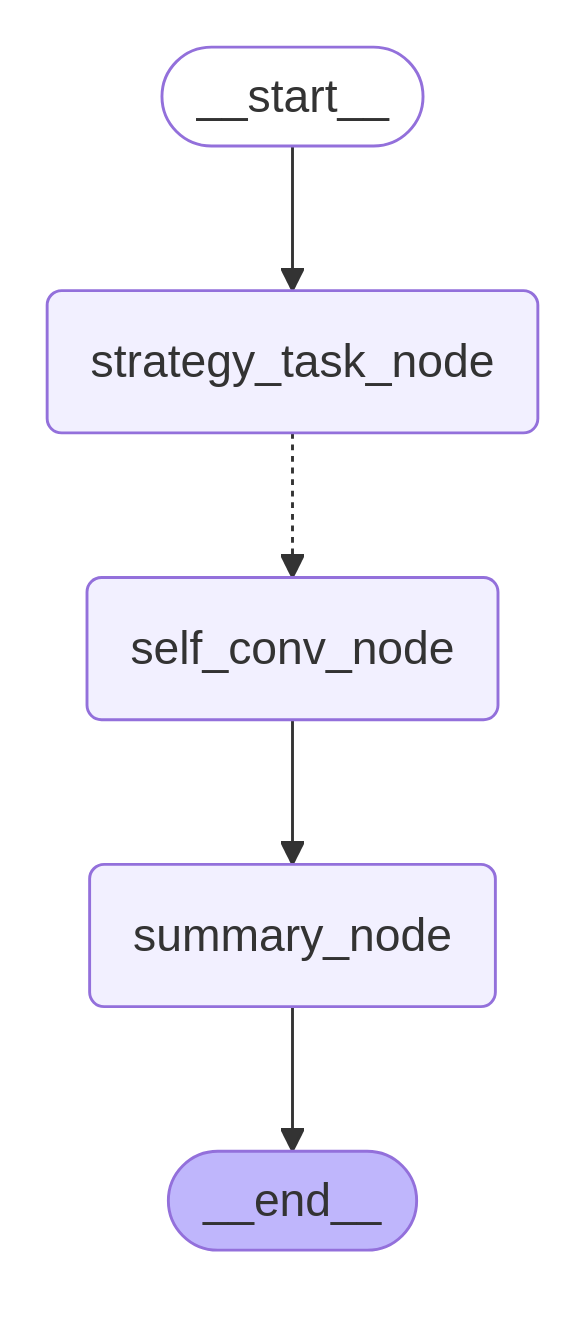

In [5]:
strategybot.display_graph()

### real llm test

In [3]:
from fcgb.cfg.precompiled import get_llm

llm = get_llm('google')

In [4]:
from fcgb.cfg.chat_inputs_spec import SelfConversationForstrategyConfig, StrategizedSelfConversationConfig
from fcgb.fake_models import FakeLLM

memory = MemorySaver()

chatbot = SelfConversationChatBot(
    llm=llm,
    initial_messages_spec=SelfConversationForstrategyConfig.initial_messages_spec,
    internal_messages_spec=SelfConversationForstrategyConfig.internal_messages_spec,
    memory=memory,
    global_inputs={'max_turns_num': 6},
    init_values=SelfConversationForstrategyConfig.init_values,
    prompt_manager_spec=SelfConversationForstrategyConfig.prompt_manager_spec
)

strategybot = StrategizedSelfConversationChatBot(
    llm=llm,
    self_conv_bot=chatbot,
    initial_messages_spec=StrategizedSelfConversationConfig.initial_messages_spec,
    internal_messages_spec=StrategizedSelfConversationConfig.internal_messages_spec,
    memory=memory,
    global_inputs=StrategizedSelfConversationConfig.global_inputs,
    init_values=StrategizedSelfConversationConfig.init_values,
    prompt_manager_spec=StrategizedSelfConversationConfig.prompt_manager_spec
)

In [5]:
inputs = {
    'template_inputs': {
        'task': 'List all variants of Chain-of-Thought (CoT) prompting.',
        'context': """To plan a chapter about CoT prompting, you want to prepare a full list of different CoT prompting methods for further research.
        The most important thing is to make sure that the list is complete and contains all possible variants of CoT prompting.""",
    },
    'ssc_thread_id': 'test_2/ssc1',
    'parent_thread_id': 'test_2'
}

In [51]:
inputs = {
    'template_inputs': {
        'task': 'List all main prompt engineering techniques with division into categories.',
        'context': """To plan a chapters of a book about prompt engineering there is a need to specify main prompt engineering techniques categories.""",
    },
    'ssc_thread_id': 'test_3/ssc1',
    'parent_thread_id': 'test_3'
}

In [ ]:
inputs = {
    'template_inputs': {
        'task': 'List all main prompt engineering techniques with division into categories.',
        'context': """To plan a chapters of a book about prompt engineering there is a need to specify main prompt engineering techniques categories.""",
    },
    'ssc_thread_id': 'test_3/ssc1',
    'parent_thread_id': 'test_3'
}

In [6]:
results = strategybot.run(**inputs)

In [7]:
results

{'template_inputs': {'task': 'List all variants of Chain-of-Thought (CoT) prompting.',
  'context': 'To plan a chapter about CoT prompting, you want to prepare a full list of different CoT prompting methods for further research.\n        The most important thing is to make sure that the list is complete and contains all possible variants of CoT prompting.'},
 'ssc_thread_id': 'test_2/ssc1',
 'parent_thread_id': 'test_2',
 'ssc_summary': SelfConvModel(answer="Here's a comprehensive list of Chain-of-Thought (CoT) prompting variants:\n\n*   Standard CoT\n*   Few-Shot CoT\n*   Zero-Shot CoT\n*   Self-Consistency\n*   Tree-of-Thoughts (ToT)\n*   Graph of Thoughts (GoT)\n*   Program-of-Thoughts (PoT)\n*   Chain-of-Hindsight (CoH)\n*   Complexity-Aware CoT\n*   Step-Back Prompting\n*   CoT-Boosting\n*   Adaptive CoT\n*   Multi-Chain CoT\n*   CoT with Knowledge Graphs\n*   CoT for Code Generation\n*   CoT for Commonsense Reasoning\n*   CoT with Planning\n*   Interactive CoT\n*   Explanation-Au

In [7]:
sep = f'\n{'-' * 40}\n'
for strategy in results['strategies'].strategies:
    print('Strategy:')
    print(strategy['strategy_description'])

    print('\nParaphrased task:')
    print(strategy['paraphrased_task'])

    print('\nParaphrased context:')
    print(strategy['paraphrased_context'])

    print(sep)

Strategy:
Comprehensive Recall: Focus on exhaustively listing all known CoT variants. Prioritize breadth and completeness over specific details for each variant. Use iterative questioning, asking 'Are there any other CoT methods?' after each answer to ensure full coverage.

Paraphrased task:
What are all the different methods and sub-methods that fall under the umbrella of Chain-of-Thought (CoT) prompting?

Paraphrased context:
I'm writing a chapter on Chain-of-Thought (CoT) prompting techniques and need to create a comprehensive list of all its variations for thoroughness.

----------------------------------------

Strategy:
Structured Exploration: Categorize CoT variants based on different criteria (e.g., based on the type of reasoning, the way examples are provided, etc.). Ask the expert to list CoT methods within each category to ensure a structured and organized exploration of the topic.

Paraphrased task:
Create a list of Chain-of-Thought prompting methods.

Paraphrased context:


In [8]:
sep = f'\n{'-' * 40}\n'
for sc_summ in results['sc_summary']:
    for line in sc_summ.split('\n'):
        print(line)
    print(sep)

The variants of Chain-of-Thought (CoT) prompting are:

- Standard CoT
- Self-Consistency CoT
- Few-Shot CoT
- Zero-Shot CoT
- Automatic Prompt Engineer (APE)
- Least-to-Most Prompting
- Tree-of-Thoughts (ToT)
- Graph of Thoughts (GoT)
- Inverse CoT
- Step-Back Prompting
- Faithful Chain-of-Thought (Faithful-CoT)
- Complexity-Based Prompting
- CoT with External Knowledge
- Program-of-Thoughts (PoT)
- Multimodal CoT

----------------------------------------

Standard CoT, Step-by-Step CoT, Least-to-Most prompting, Ablated CoT, Plan-and-Solve, Graph CoT, Self-Generated CoT, Auto-CoT, Fast CoT, Decomposed Prompting, Selection-Inference

----------------------------------------

Standard CoT, Zero-shot CoT, Self-Consistency CoT, Least-to-Most CoT, Tree-of-Thoughts (ToT), Graph-of-Thoughts (GoT), Program-of-Thoughts (PoT), Chain-of-Verification (CoVe), Generated Knowledge CoT, Step-Back prompting

----------------------------------------



In [9]:
for line in results['ssc_summary'].answer.split('\n'):
    print(line)

Based on the provided interview results, here's a comprehensive list of Chain-of-Thought (CoT) prompting variants:

*   Standard CoT
*   Self-Consistency CoT
*   Few-Shot CoT
*   Zero-Shot CoT
*   Automatic Prompt Engineer (APE)
*   Least-to-Most Prompting
*   Tree-of-Thoughts (ToT)
*   Graph of Thoughts (GoT)
*   Inverse CoT
*   Step-Back Prompting
*   Faithful Chain-of-Thought (Faithful-CoT)
*   Complexity-Based Prompting
*   CoT with External Knowledge
*   Program-of-Thoughts (PoT)
*   Multimodal CoT
*   Step-by-Step CoT
*   Ablated CoT
*   Plan-and-Solve
*   Self-Generated CoT
*   Auto-CoT
*   Fast CoT
*   Decomposed Prompting
*   Selection-Inference
*   Chain-of-Verification (CoVe)
*   Generated Knowledge CoT


In [17]:
conv_result = chatbot.get_state('test_2/ssc1/self_conv0')
for msg in conv_result['phantom_perspective']:
    msg.pretty_print()

================================ System Message ================================
Name: basic

Your mission is to by a conversation with some field expert extract information to accomplish your task with a given context.
You have maximum of 6 question-answer turns to reach your goal, but you can call the conversation end sign earlier.
Be persistent to extract as many information as you can to fulfill your task. Ask questions from different angles.
You can also argue with the expert when you will feel that their answers are not satisfying. Try different techniques to fully cover your task.

There are a few similar interview processes running simultaneusly with different strategy approaches. 
Every strategy provides paraphrased task and context to reflect on which aspects you should focus. It also describes an approach of how to ask questions.
You should focus on fulfilling paraphrased versions of task and context while following leads from strategy.

when you feel that you gain necessary

In [22]:
from fcgb.prompt_manager import PromptManager

pm = PromptManager()

prompt = pm.get_prompt('verification_prompts_gen')

In [24]:
prompt.format(**{
    'task': 'some_taks',
    'context': 'some_context',
    'answer': 'some answer',
    'min_ver_prompts': 1,
    'max_ver_prompts': 3,
})

'For a task which is: \nTASK:\nsome_taks\n\nwith given context: \nCONTEXT:\nsome_context\n\nI received an answer:\nANSWER:\nsome answer\n\n-----------\nNo I want to use LLM to verify that answer. \nPrepare list of 1 to 3 prompts templates to verify that this answer is right. Try to find weak spots based on a task and context.\nThe goal is to use those prompts to erase unrelated, redundant or excessive information, correct hallucinations, re-format answer for a better fit to a task description.\nPrompt templates can use 3 variables marked as {variable} to inject proper content. The variables are {task}, {context}, {answer}.'

# Experiments

In [23]:
from fcgb.fake_models import FakeLLM, FakeHuman

fake_llm = FakeLLM()
fake_human = FakeHuman(button_output='Some button output', button_moment=None)

In [5]:
class TestBaseChatTemplateInputs(TypedDict, total=False):
    sys_temp_1: str
    ai_temp_1: str
    hum_temp_1: str

In [ ]:
initial_messages_spec = [
            {"source": "system", "template": "base_chat_system", "hidden": False},
            {"source": "ai", "template": "base_chat_init_ai", "hidden": False},
            {"source": "human", "template": "base_chat_init_human", "hidden": True, "as_node": "human_node"},
        ]

template_inputs = {
    'sys_temp_1': 'system_input_1',
    'ai_temp_1': 'ai_input_1',
    'hum_temp_1': 'human_input_1'
}


In [ ]:
from datetime import datetime


'2025-05-19 14:24:04'

In [191]:
from langchain_core.runnables.config import RunnableConfig
from langgraph.constants import Send
from typing import List, Dict, Any, TypedDict, Annotated
from operator import add

class SubState(TypedDict):
    question: str
    messages: List[Dict[str, Any]]
    summary: str
    sub_thread_id: str
    parent_thread_id: str

class MainState(TypedDict):
    questions: List[str]
    summary: Annotated[List[str], add]
    sub_thread_id: Annotated[List[Any], add]

def conversation_node(state: SubState, config: RunnableConfig):
    print('conv node', state['question'])
    print('conv state', state)
    messages = state.get("messages", []) + [{"role": "user", "content": "..."}] + [{"role": "assistant", "content": "..."}]
    return {"messages": messages}

def summarize_node(state: SubState, config: RunnableConfig):
    summary = "summary for: " + state.get("question", "")
    print('summarize_node', summary)
    return {"summary": summary, "sub_thread_id": config["configurable"]["thread_id"]}

memory = MemorySaver()

subgraph = StateGraph(SubState) # Give the subgraph a name
subgraph.add_node("conversation", conversation_node)
subgraph.add_node("summarize", summarize_node)
subgraph.set_entry_point("conversation")
subgraph.add_edge("conversation", "summarize")
subgraph.add_edge("summarize", END)
compiled_subgraph = subgraph.compile(checkpointer=memory, name="subgraph")

def init_node(state: MainState, config: RunnableConfig):
    questions = ["question 1", "question 2", "question 3"]
    return {"questions": questions}

def routing_edge(state: MainState, config: RunnableConfig):
    thread_id = config['configurable']['thread_id']
    past_turns = len(state['summary'])
    print('routing_edge', state)
    return [Send('conv', {'question': question, 'sub_thread_id': f'{thread_id}/{i+past_turns}', 'parent_thread_id': thread_id}) for i,question in enumerate(state["questions"])]

def subgraph_node(state: SubState, config: RunnableConfig):
    response = compiled_subgraph.invoke(state, config={'configurable': {'thread_id': state['sub_thread_id']}})
    print('subgraph_node', response)
    return {'summary': [response['summary']], 'sub_thread_id': [response['sub_thread_id']]}

def output_node(state: MainState, config: RunnableConfig):
    print('output_node', state)
    return {}

maingraph = StateGraph(MainState)
maingraph.add_node("init", init_node)
maingraph.add_node("conv", subgraph_node)
maingraph.add_node("output", output_node)

maingraph.set_entry_point("init")
maingraph.add_conditional_edges("init", routing_edge, ["conv"])
maingraph.add_edge("conv", "output")
maingraph.set_finish_point("output")
compiled_maingraph = maingraph.compile(checkpointer=memory, name="maingraph")


In [195]:
config = {'configurable': {'thread_id': 'test1/3'}}
compiled_subgraph.invoke({'question': "What is the meaning of life?"}, config=config)

conv node What is the meaning of life?
conv state {'question': 'What is the meaning of life?', 'messages': [{'role': 'user', 'content': '...'}, {'role': 'assistant', 'content': '...'}], 'summary': 'summary for: question 1', 'sub_thread_id': 'test1/3', 'parent_thread_id': 'test1'}
summarize_node summary for: What is the meaning of life?


{'question': 'What is the meaning of life?',
 'messages': [{'role': 'user', 'content': '...'},
  {'role': 'assistant', 'content': '...'},
  {'role': 'user', 'content': '...'},
  {'role': 'assistant', 'content': '...'}],
 'summary': 'summary for: What is the meaning of life?',
 'sub_thread_id': 'test1/3',
 'parent_thread_id': 'test1'}

In [193]:
config = {'configurable': {'thread_id': 'test1'}}
compiled_maingraph.invoke({'summaries': [], 'threads': []}, config=config)

routing_edge {'questions': ['question 1', 'question 2', 'question 3'], 'summary': ['summary for: question 1', 'summary for: question 2', 'summary for: question 3'], 'sub_thread_id': ['test1/0', 'test1/1', 'test1/2']}
conv node question 1
conv state {'question': 'question 1', 'sub_thread_id': 'test1/3', 'parent_thread_id': 'test1'}
conv node question 2
conv state {'question': 'question 2', 'sub_thread_id': 'test1/4', 'parent_thread_id': 'test1'}
conv node question 3
conv state {'question': 'question 3', 'sub_thread_id': 'test1/5', 'parent_thread_id': 'test1'}
summarize_node summary for: question 1
summarize_node summary for: question 2
summarize_node summary for: question 3
subgraph_node {'question': 'question 1', 'messages': [{'role': 'user', 'content': '...'}, {'role': 'assistant', 'content': '...'}], 'summary': 'summary for: question 1', 'sub_thread_id': 'test1/3', 'parent_thread_id': 'test1'}
subgraph_node {'question': 'question 2', 'messages': [{'role': 'user', 'content': '...'}, {

{'questions': ['question 1', 'question 2', 'question 3'],
 'summary': ['summary for: question 1',
  'summary for: question 2',
  'summary for: question 3',
  'summary for: question 1',
  'summary for: question 2',
  'summary for: question 3'],
 'sub_thread_id': ['test1/0',
  'test1/1',
  'test1/2',
  'test1/3',
  'test1/4',
  'test1/5']}

In [194]:
memory.get({'configurable': {'thread_id': 'test1/3'}})

{'v': 3,
 'ts': '2025-05-19T12:59:08.091816+00:00',
 'id': '1f034b10-d073-6932-8002-01716646f215',
 'channel_versions': {'__start__': '00000000000000000000000000000002.0.09870959791305467',
  'question': '00000000000000000000000000000002.0.23559829325603876',
  'sub_thread_id': '00000000000000000000000000000004.0.21746122845995886',
  'parent_thread_id': '00000000000000000000000000000002.0.473865111175267',
  'branch:to:conversation': '00000000000000000000000000000003.0.8975372832302293',
  'messages': '00000000000000000000000000000003.0.8872705994398674',
  'branch:to:summarize': '00000000000000000000000000000004.0.49317071265445367',
  'summary': '00000000000000000000000000000004.0.5372675794601917'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000001.0.7129236985518004'},
  'conversation': {'branch:to:conversation': '00000000000000000000000000000002.0.048758464188705886'},
  'summarize': {'branch:to:summarize': '00000000000000000000000

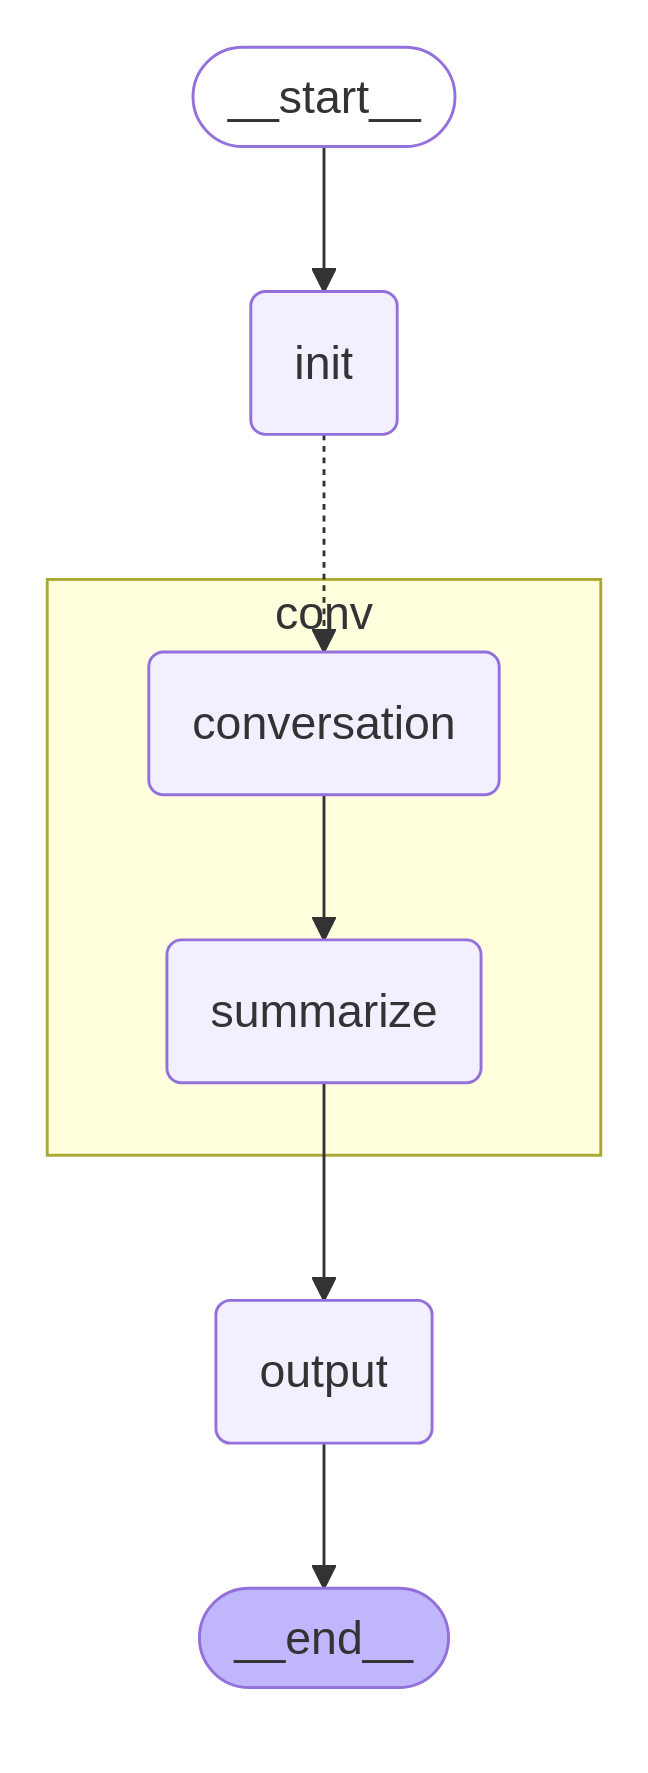

In [32]:
nest_asyncio.apply()
display(Image(compiled_maingraph.get_graph(xray=1).draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER), height=200, width=200))